In [92]:
import numpy as np 
import pandas as pd

In [93]:
df=pd.DataFrame()

In [94]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [95]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [96]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

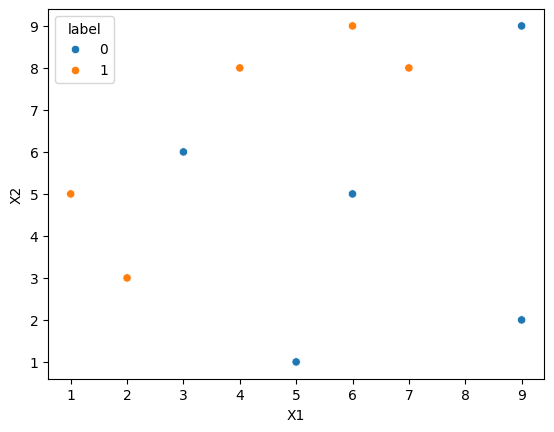

In [97]:


sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])

In [98]:
df["weights"]=1/df.shape[0]

In [99]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt1=DecisionTreeClassifier(max_depth=1)

In [102]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-2].values

In [103]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [104]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [105]:
df["y_pred"]=dt1.predict(X)

In [106]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [107]:
def calculate_model_weight(error):
    
    return 0.5*np.log((1-error)/(error))

In [108]:
alpha1=calculate_model_weight(0.3)

In [109]:
alpha1

0.42364893019360184

In [110]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)


In [111]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
     

In [112]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [113]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
     

df
     

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [114]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [115]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [117]:

df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']


In [118]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [127]:
def create_new_dataset(df):
    
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices



In [128]:
index_values = create_new_dataset(df)

index_values

[8, 7, 7, 3, 1, 5, 5, 0, 7, 8]

In [129]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [130]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1


repeat these for two times
calculate the alpha values
then predict by using the trees
alpha1*dt1.predict() + alpha2*dt2.predict() + alpha3*dt.predict()

